In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_curve, auc, accuracy_score, roc_auc_score
from xgboost.sklearn import XGBClassifier

import joblib 

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 90)

%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle


In [2]:
df = pickle.load(open('data/final_df_dummies.p', 'rb'))
df.drop(columns=['customer_city','seller_city','index'], inplace=True)

In [3]:
df.head()

,payment_value,price,freight_value,payment_installments,items_in_order,freight_total_pay,freight_item_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_approval_time,total_order_time,order_estimated_delivery,order_estimation_difference,order_shipping_limit,order_approval_time_average,total_order_time_average,order_estimated_delivery_average,order_estimation_difference_average,order_shipping_limit_average,product_category_name_english_agro_industry_and_commerce,product_category_name_english_air_conditioning,product_category_name_english_art,product_category_name_english_arts_and_craftmanship,product_category_name_english_audio,product_category_name_english_auto,product_category_name_english_baby,product_category_name_english_bed_bath_table,product_category_name_english_books_general_interest,product_category_name_english_books_imported,product_category_name_english_books_technical,product_category_name_english_cds_dvds_musicals,product_category_name_english_christmas_supplies,product_category_name_english_cine_photo,product_category_name_english_computers,product_category_name_english_computers_accessories,product_category_name_english_consoles_games,product_category_name_english_construction_tools_construction,product_category_name_english_construction_tools_lights,product_category_name_english_construction_tools_safety,product_category_name_english_cool_stuff,product_category_name_english_costruction_tools_garden,product_category_name_english_costruction_tools_tools,product_category_name_english_diapers_and_hygiene,product_category_name_english_drinks,product_category_name_english_dvds_blu_ray,product_category_name_english_electronics,product_category_name_english_fashio_female_clothing,product_category_name_english_fashion_bags_accessories,product_category_name_english_fashion_childrens_clothes,product_category_name_english_fashion_male_clothing,product_category_name_english_fashion_shoes,product_category_name_english_fashion_sport,product_category_name_english_fashion_underwear_beach,product_category_name_english_fixed_telephony,product_category_name_english_flowers,product_category_name_english_food,product_category_name_english_food_drink,product_category_name_english_furniture_bedroom,product_category_name_english_furniture_decor,product_category_name_english_furniture_living_room,product_category_name_english_furniture_mattress_and_upholstery,product_category_name_english_garden_tools,product_category_name_english_health_beauty,product_category_name_english_home_appliances,product_category_name_english_home_appliances_2,product_category_name_english_home_comfort_2,product_category_name_english_home_confort,product_category_name_english_home_construction,product_category_name_english_housewares,product_category_name_english_industry_commerce_and_business,product_category_name_english_kitchen_dining_laundry_garden_furniture,product_category_name_english_la_cuisine,product_category_name_english_luggage_accessories,product_category_name_english_market_place,product_category_name_english_music,product_category_name_english_musical_instruments,product_category_name_english_office_furniture,product_category_name_english_party_supplies,product_category_name_english_perfumery,product_category_name_english_pet_shop,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer

In [4]:
cols = [ 'order_approval_time','total_order_time','order_estimated_delivery','order_estimation_difference','order_shipping_limit','order_approval_time_average','total_order_time_average','order_estimated_delivery_average','order_estimation_difference_average','order_shipping_limit_average']
df.drop(columns=cols, inplace=True)

# for col in cols:
#     df[col] = df[col].astype(str)
#     df[col] = pd.to_datetime(df[col], infer_datetime_format=True)
# pd.to_datetime(x, format='%d %H:%M:%S')
#     df[col] = df[col].astype('int64')
# df['order_approval_time'][0] = df['order_approval_time'][0][:15]
# pd.qcut(df['order_approval_time'], q=4)

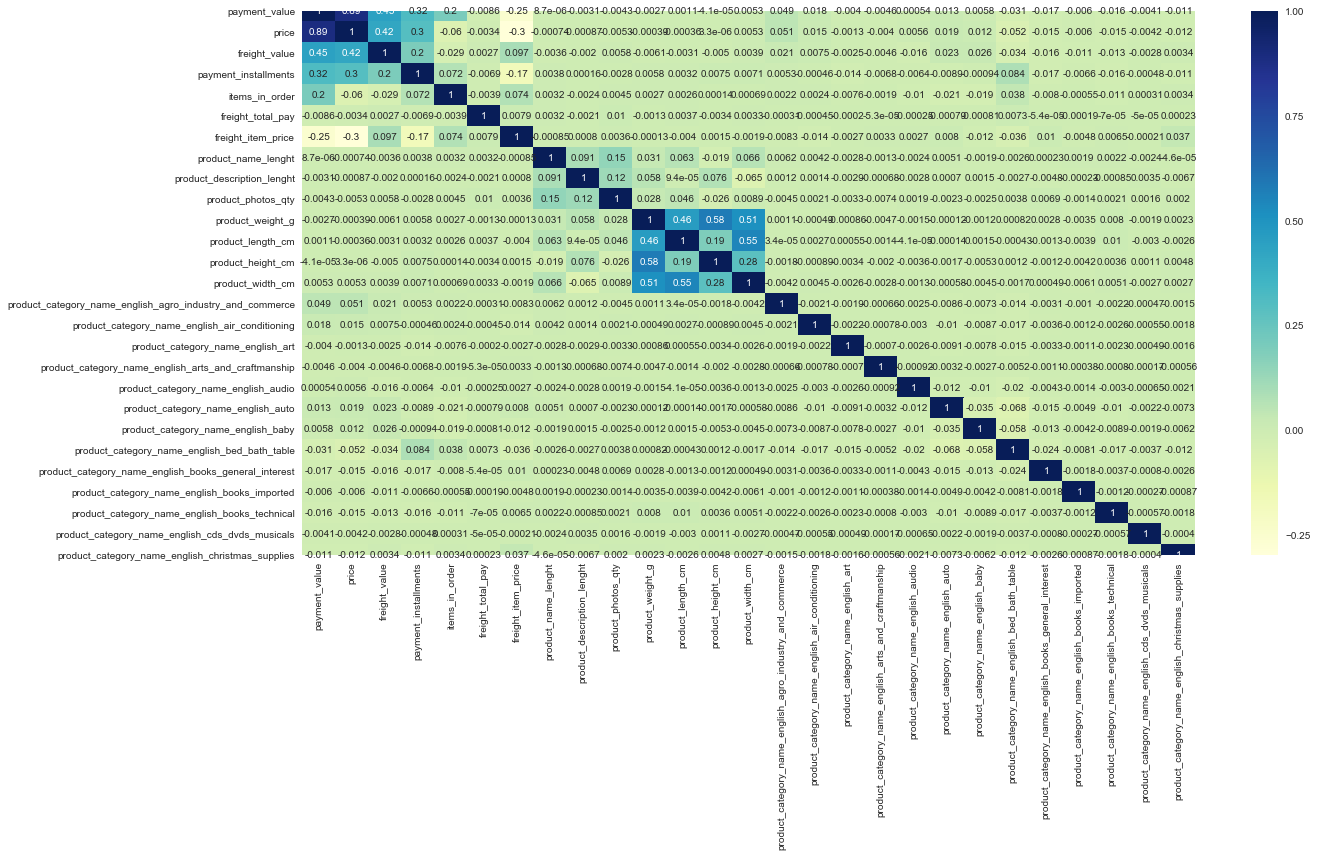

In [5]:
df_no_dummies = df.iloc[:,:27]
fig, ax =  plt.subplots(figsize=(20,10))
sns.heatmap(df_no_dummies.corr(),annot=True,cmap="YlGnBu",ax=ax)

We only have one variable with high multicolinearity with our target variable, and so this variable is not included in the regression.

In [6]:
df.drop(columns=['price'], inplace=True)

# Linear Model

The relationship between the variables in the data can be modelled using linear regression. 

The model gives us an R-Squared value of *.
This measure provides an explanation of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. In simple terms, this can be seen as a measure of how well our model performs at prediciting customer spend, based on the varibles we have.

The excersie is also useful in seeing which factors have the most impact on the customer's total spend. For this reason, the item prices were emitted, as there is a causal relationship between these and the customer's total spend.

In [7]:
y = df['payment_value']
X = df.drop(columns=['payment_value'], axis=1)
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=123)

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train_)
X_test_scaled = scale.fit_transform(X_test_)

X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

In [8]:
linreg_ridge = Ridge()
linreg_ridge.fit(X_train, y_train) 

pred = linreg_ridge.predict(X_train)
pred_test = linreg_ridge.predict(X_test)

print('For our initial model, our values are:')
print('Training r^2:', linreg_ridge.score(X_train, y_train))
print('Training MSE:', mean_squared_error(y_train, pred))

print('And for our testing dataset, our values are:')
print('Training r^2:', linreg_ridge.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_test, pred_test))

For our initial model, our values are:
Training r^2: 0.41757771842114844
Training MSE: 28846.113869017332
And for our testing dataset, our values are:
Training r^2: 0.4639264761363595
Training MSE: 25094.18128862629


In [9]:
linreg_lasso = Lasso()
linreg_lasso.fit(X_train, y_train) 

pred = linreg_lasso.predict(X_train)
pred_test = linreg_lasso.predict(X_test)

print('For our initial model, our values are:')
print('Training r^2:', linreg_lasso.score(X_train, y_train))
print('Training MSE:', mean_squared_error(y_train, pred))

print('And for our testing dataset, our values are:')
print('Training r^2:', linreg_lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_test, pred_test))

For our initial model, our values are:
Training r^2: 0.41555445646307565
Training MSE: 28946.32165068256
And for our testing dataset, our values are:
Training r^2: 0.461194837253851
Training MSE: 25222.052258337088


In [10]:
print(X.columns[:12])

Index(['freight_value', 'payment_installments', 'items_in_order',
       'freight_total_pay', 'freight_item_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


In [11]:
coefficients = pd.DataFrame(zip(X.columns, linreg_lasso.coef_))
coefficients.columns = ['coef','value']
coefficients['norm'] = (coefficients['value']-coefficients['value'].min()) / (coefficients['value'].max()-coefficients['value'].min())
coefficients.sort_values(by='value', ascending=False, inplace=True)
coefficients.head()

,coef,value,norm
0,freight_value,98.356955,1.000000
2,items_in_order,50.383538,0.690645
1,payment_installments,38.829433,0.616138
26,product_category_name_english_computers,30.277952,0.560994
82,product_category_name_english_watches_gifts,13.584359,0.453346


# Results and Price Predictions

This model can now we used to predict customers' spends going forward. This will be useful for both Olist and independent sellers who use the Marketplace.

To further analyse the results of our regression model, we extract the coefficients and their weights. The coefficients with the highest positive and negitive impact are as follows:

In [12]:
top_coefs = coefficients.iloc[:12]
top_coefs

,coef,value,norm
0,freight_value,98.356955,1.000000
2,items_in_order,50.383538,0.690645
1,payment_installments,38.829433,0.616138
26,product_category_name_english_computers,30.277952,0.560994
82,product_category_name_english_watches_gifts,13.584359,0.453346
138,payment_type_boleto,9.626206,0.427822
46,product_category_name_english_fixed_telephony,8.852476,0.422832
75,product_category_name_english_small_appliances,8.065690,0.417759
76,product_category_name_english_small_appliances...,7.786167,0.415956
126,seller_state_RJ,7.602008,0.414769


In [13]:
top_coefs['coefs'] = ['Freight Value', 'Items in Order', '# Installments',
       'Prod Cat: Computers',
       'Prod Cat: Watches % Gifts',
       'Pay Type: Boleto',
       'Prod Cat: fixed_telephony',
       'Prod Cat: Small Appliances',
       'Prod Cat: Appliances(Home Oven & Coffee)',
       'Seller State: RJ',
       'Prod Cat: Musical Instruments',
       'Prod Cat: Home Appliances']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


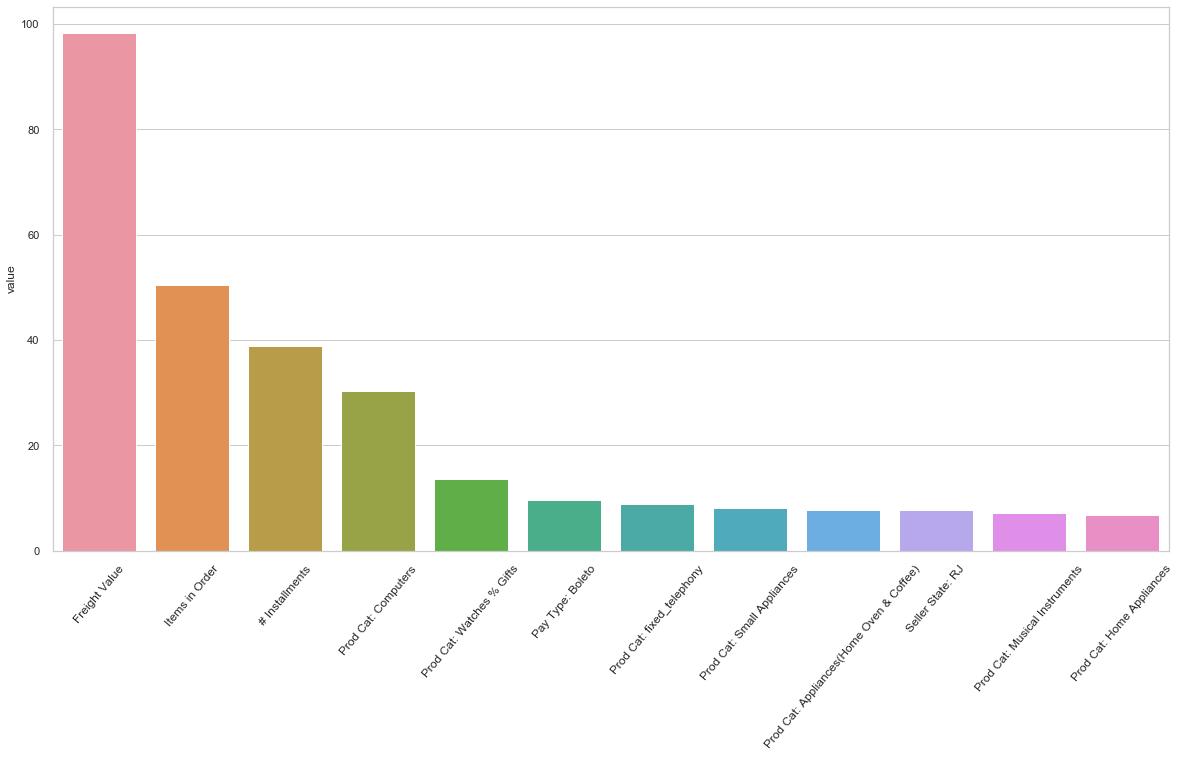

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

x=['Freight Value', 'Items in Order', '# Installments',
       'Prod Cat: Computers',
       'Prod Cat: Watches % Gifts',
       'Pay Type: Boleto',
       'Prod Cat: fixed_telephony',
       'Prod Cat: Small Appliances',
       'Prod Cat: Appliances(Home Oven & Coffee)',
       'Seller State: RJ',
       'Prod Cat: Musical Instruments',
       'Prod Cat: Home Appliances']

sns.set(style="whitegrid")
plt.figure(figsize=[20,10])

ax = sns.barplot(x=x, y='value', data=top_coefs)
ax.set_xticklabels(x, rotation=50, fontsize=12)
plt.savefig('top_coefs.png', format='png', dpi=50)
plt.show()

In [273]:
neg_coefs = coefficients.iloc[-12:]
coefs

,coef,value,norm
63,product_category_name_english_kitchen_dining_l...,-2.161349,0.351810
52,product_category_name_english_furniture_living...,-2.544731,0.349338
118,seller_state_MG,-2.797378,0.347709
98,customer_state_PE,-3.001487,0.346392
65,product_category_name_english_luggage_accessories,-3.317179,0.344357
117,seller_state_MA,-3.965010,0.340179
141,payment_type_voucher,-4.023822,0.339800
69,product_category_name_english_office_furniture,-4.122637,0.339163
61,product_category_name_english_housewares,-4.868224,0.334355
51,product_category_name_english_furniture_decor,-6.807104,0.321852


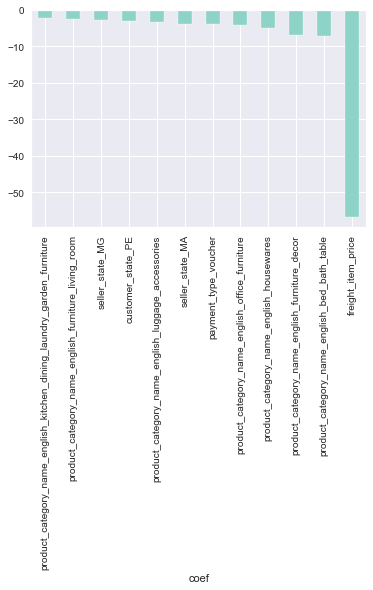

In [278]:
neg_coefs.plot(x='coef', y='value', kind='bar', legend=False, colormap='Set3')

In [ ]:
x=['Freight Value', 'Items in Order', '# Installments',
       'Prod Cat: Computers',
       'Prod Cat: Watches % Gifts',
       'Pay Type: Boleto',
       'Prod Cat: fixed_telephony',
       'Prod Cat: Small Appliances',
       'Prod Cat: Appliances(Home Oven & Coffee)',
       'Seller State: RJ',
       'Prod Cat: Musical Instruments',
       'Prod Cat: Home Appliances']

sns.set(style="whitegrid")
plt.figure(figsize=[20,10])

ax = sns.barplot(x=x, y='value', data=top_coefs)
ax.set_xticklabels(x, rotation=50, fontsize=12)
plt.show()
plt.savefig('top_coefs.png')

# Conclusions

Extracting our coefficients from our regression model allows us to give further insight back to our clients. The following suggestions could be made from our data: